# Processos Feito Anterioremente

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)

y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

# Validação Cruzada
from sklearn.model_selection import cross_val_score, KFold

resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())

# Análise dos Resultados

In [3]:
resultados = pd.DataFrame({
    'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
    'KNN': resultados_knn, 'Logistica': resultados_logistica,
    'SVM': resultados_svm, 'Rede neural': resultados_rede_neural
})

resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9845,0.9815,0.9475,0.9845,0.9970
1,0.9850,0.9825,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9860,0.9795,0.9470,0.9865,0.9970
3,0.9870,0.9790,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9855,0.9820,0.9465,0.9850,0.9970
5,0.9885,0.9790,0.9780,0.9465,0.9845,0.9975
6,0.9885,0.9860,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9820,0.9800,0.9480,0.9850,0.9975
8,0.9865,0.9835,0.9795,0.9465,0.9840,0.9965
9,0.9875,0.9855,0.9820,0.9465,0.9845,0.9965


In [5]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987333,0.983533,0.980050,0.947000,0.985083,0.997083
std,0.001605,0.001893,0.001533,0.000743,0.001280,0.000617
min,0.984000,0.979000,0.977000,0.945500,0.982000,0.995500
25%,0.986500,0.982500,0.979000,0.946500,0.984125,0.996625
50%,0.987250,0.983750,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.984500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.986500,0.982500,0.948500,0.987500,0.998500


In [6]:
resultados.var()

Arvore           2.574713e-06
Random forest    3.585057e-06
KNN              2.350862e-06
Logistica        5.517241e-07
SVM              1.639368e-06
Rede neural      3.807471e-07
dtype: float64

In [8]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.162518
Random forest    0.192513
KNN              0.156446
Logistica        0.078435
SVM              0.129977
Rede neural      0.061885
dtype: float64

In [22]:
resultados.mean()

Arvore           0.987333
Random forest    0.983533
KNN              0.980050
Logistica        0.947000
SVM              0.985083
Rede neural      0.997083
dtype: float64

# Teste de normalidade nos resultados

In [9]:
alpha = 0.05

In [10]:
from scipy.stats import shapiro

In [11]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9620043014916738, pvalue=0.3481962799618571),
 ShapiroResult(statistic=0.9435475977390735, pvalue=0.11335944598039632),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.9309147727892649, pvalue=0.051930740130906254),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434),
 ShapiroResult(statistic=0.9388893692023382, pvalue=0.0849074176781166))

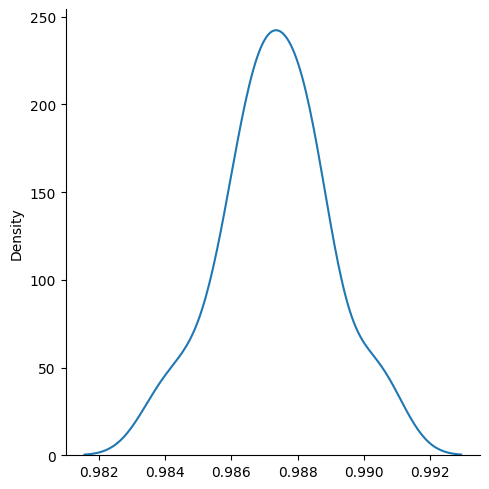

In [15]:
sns.displot(resultados_arvore, kind='kde');

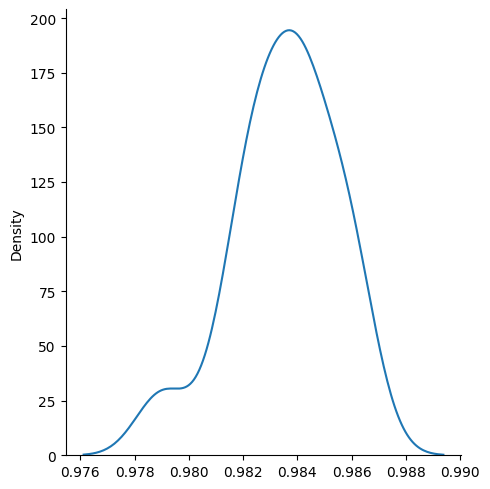

In [16]:
sns.displot(resultados_random_forest, kind='kde');

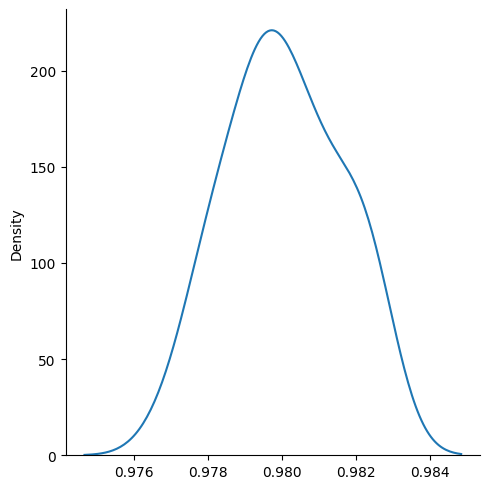

In [17]:
sns.displot(resultados_knn, kind='kde');

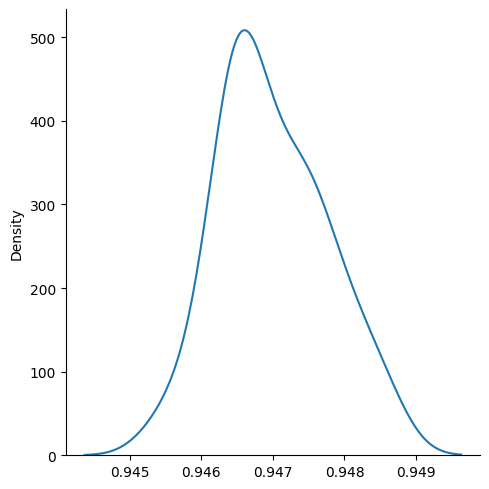

In [18]:
sns.displot(resultados_logistica, kind='kde');

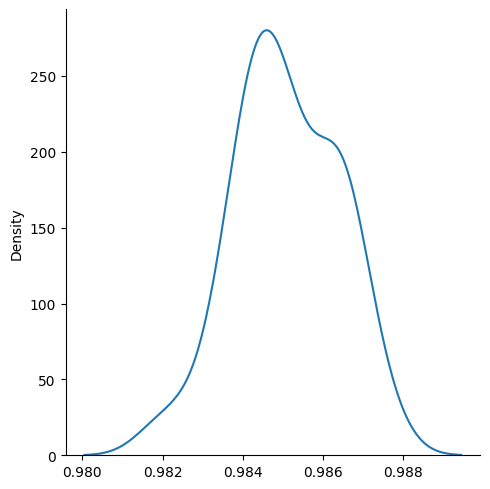

In [19]:
sns.displot(resultados_svm, kind='kde');

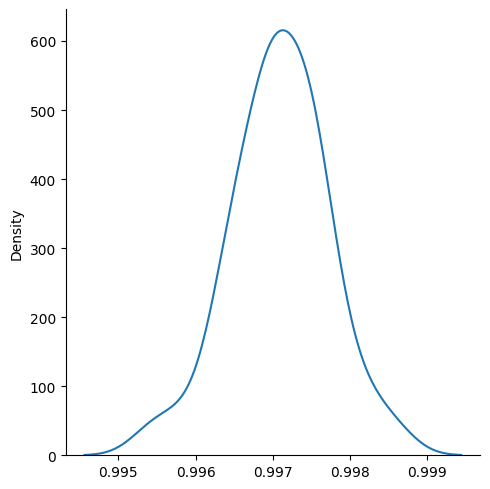

In [21]:
sns.displot(resultados_rede_neural, kind='kde');